In [1]:
from project3_hw_lib import *
import numpy as np
from numba import njit, prange
from scipy.sparse import dia_array
from scipy.sparse import csc_matrix
import scipy.sparse.linalg as splinalg
import matplotlib.pyplot as plt
import time

In [2]:
# %% Problem 1
N = 3
A = generate_the_laplace_matrix_with_size(N)
# print(A)
A = csc_matrix(A)
b = generate_the_rhs_vector_with_size(N=N)
# print(b)
x = splinalg.spsolve(A,b)
# print(x)
# check the solution
# print(A.dot(x) - b)

u = convert_solution(x)
print(u.T)

[[-0.0625 -0.125  -0.0625]
 [-0.125  -0.375  -0.125 ]
 [-0.0625 -0.125  -0.0625]]


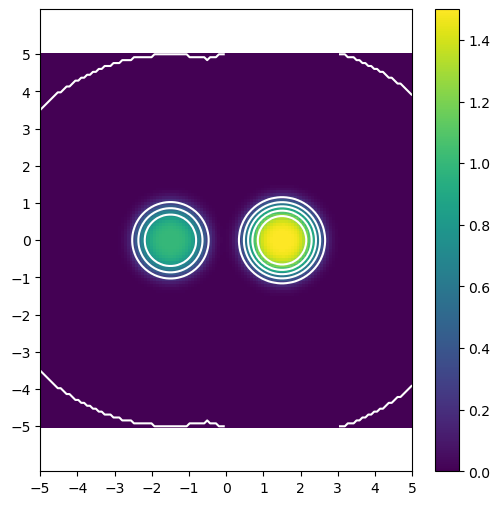

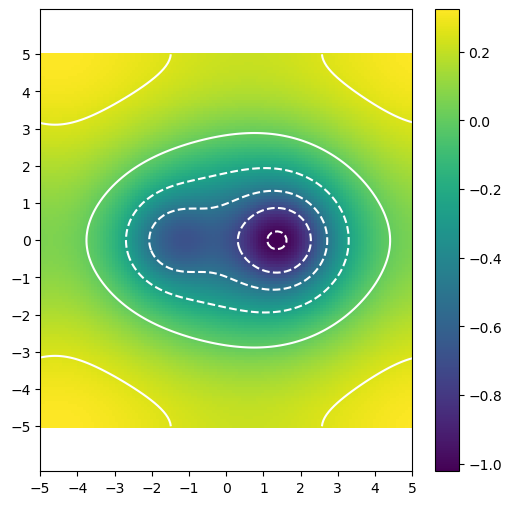

In [3]:
# %% Problem 2
N = 128
periodic = True
xx,yy, rho = generate_rho(N=N, xmin=-5, xmax=5, ymin=-5,ymax=5)
plot_solution(xx,yy,rho)

A = generate_the_laplace_matrix_with_size(N=N, periodic=periodic)
b = generate_the_rhs_vector_with_size(N=N, rho=rho, dx=10/(N-1), dy=10/(N-1))
if periodic:
    x = splinalg.lsmr(csc_matrix(A), b)[0]
else:
    x = splinalg.spsolve(csc_matrix(A),b)


u = convert_solution(x).T

plot_solution(xx,yy,u)

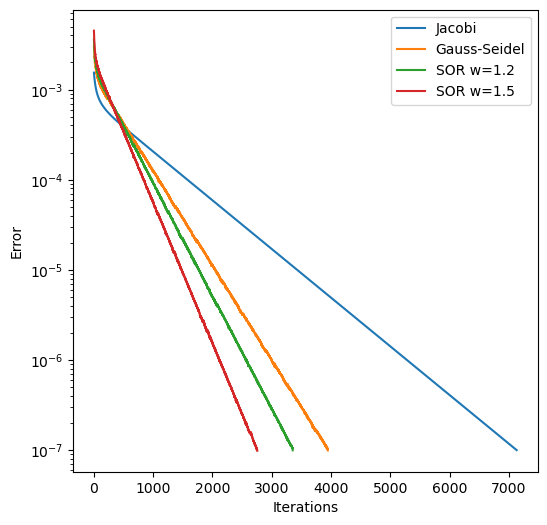

In [13]:
# %% Problem 3
N = 128
periodic = True
_,_, rho = generate_rho(N=N, xmin=-5, xmax=5, ymin=-5, ymax=5)

xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
u, iters_j, errors_j = relax(u, method='jacobi', tolerance=1e-5, maxiter=1e4, periodic=periodic, rho=rho, dx=dx, dy=dy)
print('Jacobi relaxation done')
# plot_solution(xx,yy,u)

xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
u, iters_gs, errors_gs = relax(u, method='gauss-seidel', tolerance=1e-5, maxiter=1e4, periodic=periodic, rho=rho, dx=dx, dy=dy)
print('Gauss-Seidel relaxation done')
# plot_solution(xx,yy,u)

xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
u, iters_sor12, errors_sor12 = relax(u, method='sor', tolerance=1e-5, maxiter=1e4, periodic=periodic, rho=rho, dx=dx, dy=dy, w=1.2)
print('SOR w=1.2 relaxation done')
# plot_solution(xx,yy,u)

xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
u, iters_sor15, errors_sor15 = relax(u, method='sor', tolerance=1e-5, maxiter=1e4, periodic=periodic, rho=rho, dx=dx, dy=dy, w=1.5)
print('SOR w=1.5 relaxation done')
# plot_solution(xx,yy,u)

xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
u, iters_sor20, errors_sor20 = relax(u, method='sor', tolerance=1e-5, maxiter=1e2, periodic=periodic, rho=rho, dx=dx, dy=dy, w=2.0)
print('SOR w=2.0 relaxation done')
# plot_solution(xx,yy,u)

# plot errors vs iterations
plt.figure(1, figsize=(6,6))
plt.plot(iters_j, errors_j, label='Jacobi')
plt.plot(iters_gs, errors_gs, label='Gauss-Seidel')
plt.plot(iters_sor12, errors_sor12, label='SOR w=1.2')
plt.plot(iters_sor15, errors_sor15, label='SOR w=1.5')
# plt.plot(iters_sor20, errors_sor20, label='SOR w=2.0')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()
plt.close()

Sparse solver done
Jacobi relaxation done
Gauss-Seidel relaxation done
SOR w=1.2 relaxation done
SOR w=1.5 relaxation done
Sparse solver done
Jacobi relaxation done
Gauss-Seidel relaxation done
SOR w=1.2 relaxation done
SOR w=1.5 relaxation done
Sparse solver done
Jacobi relaxation done
Gauss-Seidel relaxation done
SOR w=1.2 relaxation done
SOR w=1.5 relaxation done
Sparse solver done
Jacobi relaxation done
Gauss-Seidel relaxation done
SOR w=1.2 relaxation done
SOR w=1.5 relaxation done
Sparse solver done
Jacobi relaxation done
Gauss-Seidel relaxation done
SOR w=1.2 relaxation done
SOR w=1.5 relaxation done


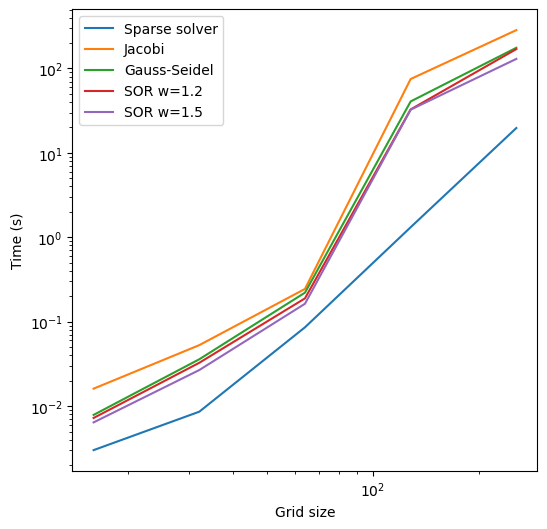

In [7]:
# %% Problem 4
spar_time = []
jac_time = []
gs_time = []
sor12_time = []
sor15_time = []

# grid_list =  [32, 64, 128]
grid_list =  [16, 32, 64, 128, 256]
periodic = True
tolerance = 1e-7
maxiter = 1e6
for N in grid_list:
    xx,yy, rho = generate_rho(N=N, xmin=-5, xmax=5, ymin=-5,ymax=5)
    A = generate_the_laplace_matrix_with_size(N=N, periodic=periodic)
    b = generate_the_rhs_vector_with_size(N=N, rho=rho, dx=10/(N-1), dy=10/(N-1))
    if periodic:
        start = time.time()
        x = splinalg.lsmr(csc_matrix(A), b)[0]
        end = time.time()
    else:
        start = time.time()
        x = splinalg.spsolve(csc_matrix(A),b)
        end = time.time()
    spar_time.append(end-start)
    print('Sparse solver done')


    _,_, rho = generate_rho(N=N, xmin=-5, xmax=5, ymin=-5, ymax=5)

    xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
    start = time.time()
    u, iters_j, errors_j = relax(u, method='jacobi', tolerance=tolerance, maxiter=maxiter, periodic=periodic, rho=rho, dx=dx, dy=dy)
    end = time.time()
    jac_time.append(end-start)
    print('Jacobi relaxation done')
    
    xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
    start = time.time()
    u, iters_gs, errors_gs = relax(u, method='gauss-seidel', tolerance=tolerance, maxiter=maxiter, periodic=periodic, rho=rho, dx=dx, dy=dy)
    end = time.time()
    gs_time.append(end-start)
    print('Gauss-Seidel relaxation done')
    
    xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
    start = time.time()
    u, iters_sor12, errors_sor12 = relax(u, method='sor', tolerance=tolerance, maxiter=maxiter, periodic=periodic, rho=rho, dx=dx, dy=dy, w=1.2)
    end = time.time()
    sor12_time.append(end-start)
    print('SOR w=1.2 relaxation done')
    
    xx, yy, dx, dy, u = generate_mash(N=N, buff=1, xmin=-5, xmax=5, ymin=-5, ymax=5, periodic=periodic)
    start = time.time()
    u, iters_sor15, errors_sor15 = relax(u, method='sor', tolerance=tolerance, maxiter=maxiter, periodic=periodic, rho=rho, dx=dx, dy=dy, w=1.5)
    end = time.time()
    sor15_time.append(end-start)
    print('SOR w=1.5 relaxation done')

plt.figure(1, figsize=(6,6))
plt.plot(grid_list, spar_time, label='Sparse solver')
plt.plot(grid_list, jac_time, label='Jacobi')
plt.plot(grid_list, gs_time, label='Gauss-Seidel')
plt.plot(grid_list, sor12_time, label='SOR w=1.2')
plt.plot(grid_list, sor15_time, label='SOR w=1.5')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grid size')
plt.ylabel('Time (s)')
plt.legend()
plt.show()
plt.close()